<a href="https://colab.research.google.com/github/ashfarhangi/Massive_Storage_and_Big_Data/blob/master/code/6_CNN_HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing heatmaps of class activation

In [1]:
!pip install keras==2.2.2
!pip install tensorflow==1.12.0

  Using cached https://files.pythonhosted.org/packages/71/26/1e778ebd737032749824d5cba7dbd3b0cf9234b87ab5ec79f5f0403ca7e9/Keras_Preprocessing-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/54/90/8f327deaa37a71caddb59b7b4aaa9d4b3e90c0e76f8c2d1572005278ddc5/Keras_Applications-1.0.4-py2.py3-none-any.whl
ERROR: tensorflow 1.12.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
ERROR: tensorflow 1.12.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
# note that we keep the densely connected classifier;
# in the two previous vizualization methods, we discarded it
model = VGG16(weights='imagenet') 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [4]:
!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank1.jpg?raw=true \
  -O tank1.jpg
  
!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank2.jpg?raw=true \
  -O tank2.jpg
  
!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank3.jpg?raw=true \
  -O tank3.jpg
  
!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank4.jpg?raw=true \
  -O tank4.jpg  
  
!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank5.png?raw=true \
  -O tank5.png  

!wget https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/elephant.jpg -O elephant.jpg

--2020-10-28 20:26:52--  https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank1.jpg?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123930 (121K) [image/jpeg]
Saving to: ‘tank1.jpg’

tank1.jpg           100%[===================>] 121.03K  --.-KB/s    in 0.02s   

2020-10-28 20:26:52 (5.18 MB/s) - ‘tank1.jpg’ saved [123930/123930]

--2020-10-28 20:26:52--  https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tank2.jpg?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [5]:
img_path1 = 'tank1.jpg'
img_path2 = 'tank2.jpg'
img_path3 = 'tank3.jpg'
img_path4 = 'tank4.jpg'
img_path5 = 'tank5.png'

img_path6 = 'elephant.jpg'

In [6]:
last_conv_layer = model.get_layer('block5_conv3')

In [7]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import backend as K

In [8]:

def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [9]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=3)[0])
  #
  #class_index = np.argmax(preds[0])
  class_index = np.argsort(preds[0])[-(1+idx)]
  class_output = model.output[:, class_index]
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  #
  show_superimposed_image(img_path, heatmap)

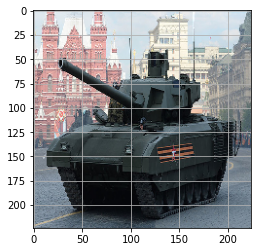

Predicted: [('n04389033', 'tank', 0.99444467), ('n02950826', 'cannon', 0.004331066), ('n02704792', 'amphibian', 0.0008170056)]


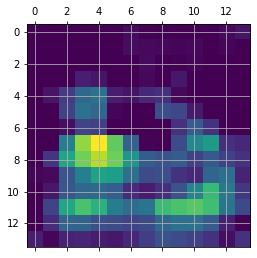

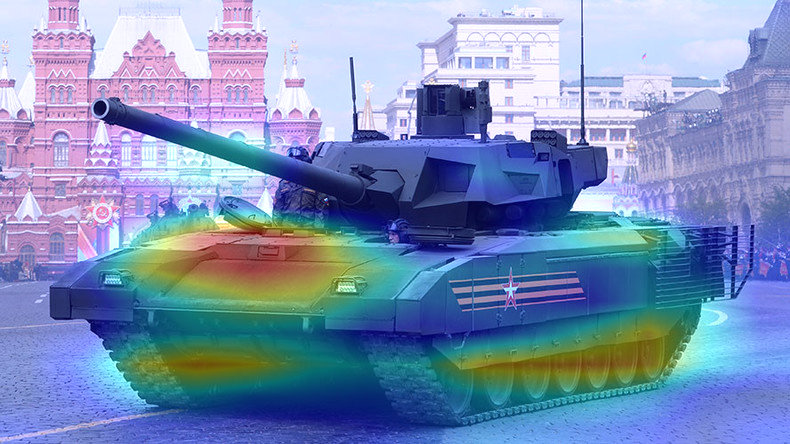

In [10]:
process_image(img_path1)

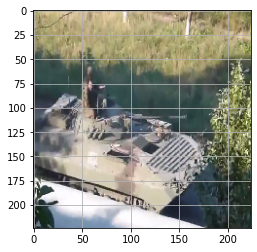

Predicted: [('n04389033', 'tank', 0.3296712), ('n02704792', 'amphibian', 0.2512833), ('n03478589', 'half_track', 0.078204066)]


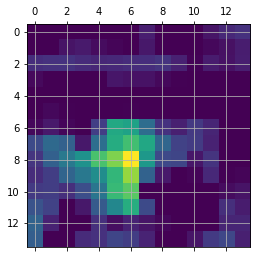

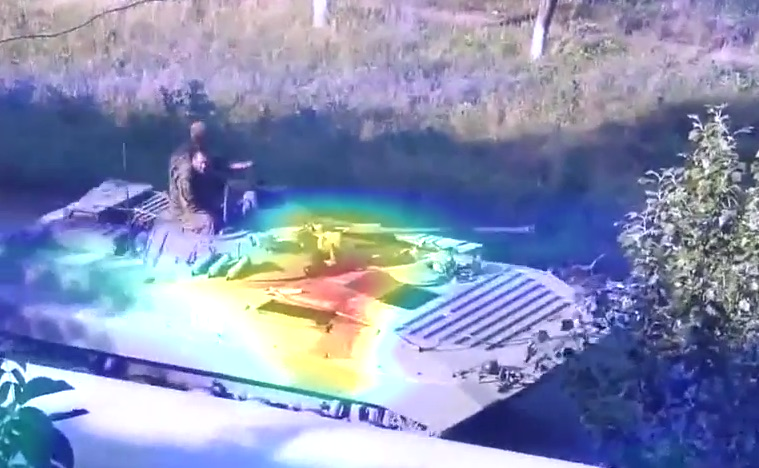

In [11]:
process_image(img_path2)

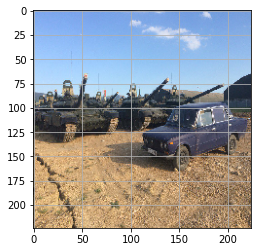

Predicted: [('n02704792', 'amphibian', 0.4870531), ('n04389033', 'tank', 0.42166892), ('n03594945', 'jeep', 0.037851457)]


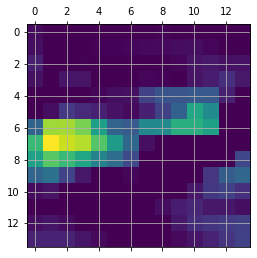

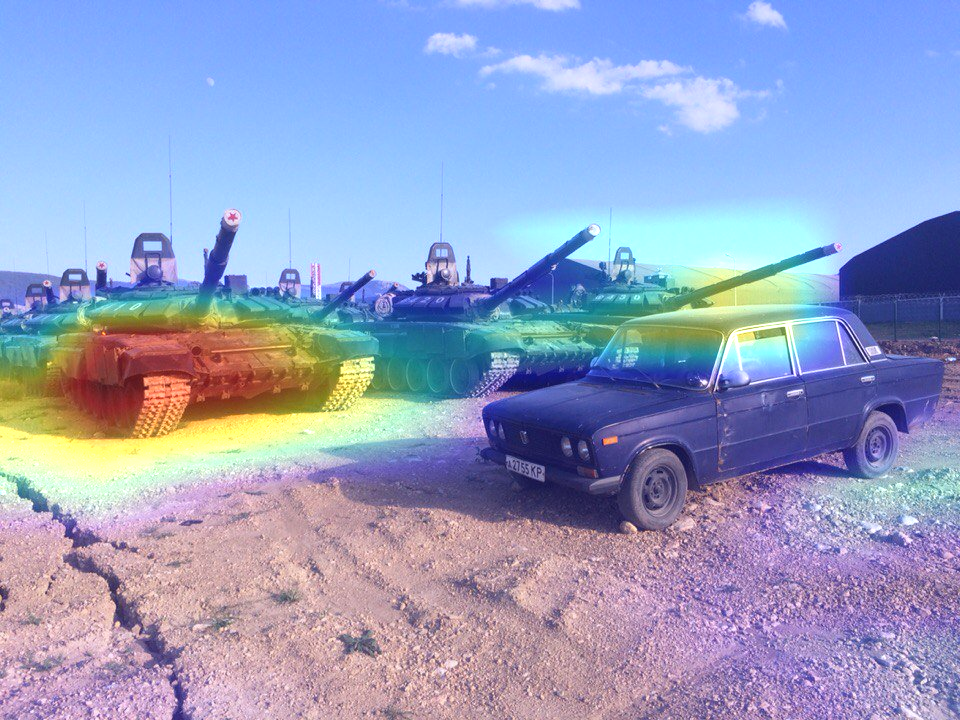

In [12]:
process_image(img_path3, idx=1)

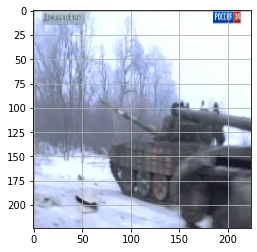

Predicted: [('n04389033', 'tank', 0.61302674), ('n03478589', 'half_track', 0.19191647), ('n02749479', 'assault_rifle', 0.052881118)]


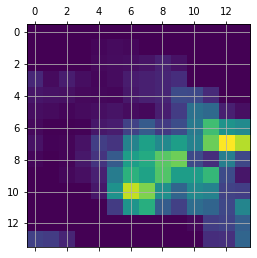

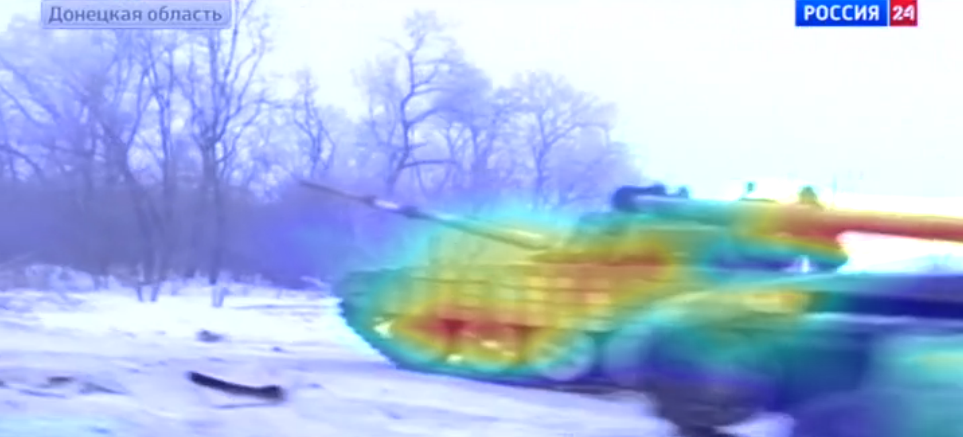

In [13]:
process_image(img_path4)

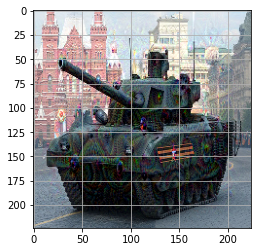

Predicted: [('n04389033', 'tank', 0.9478098), ('n02950826', 'cannon', 0.05167737), ('n04008634', 'projectile', 0.00018351898)]


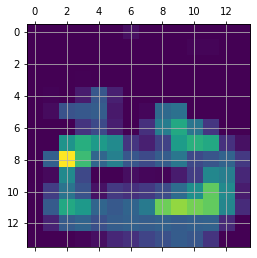

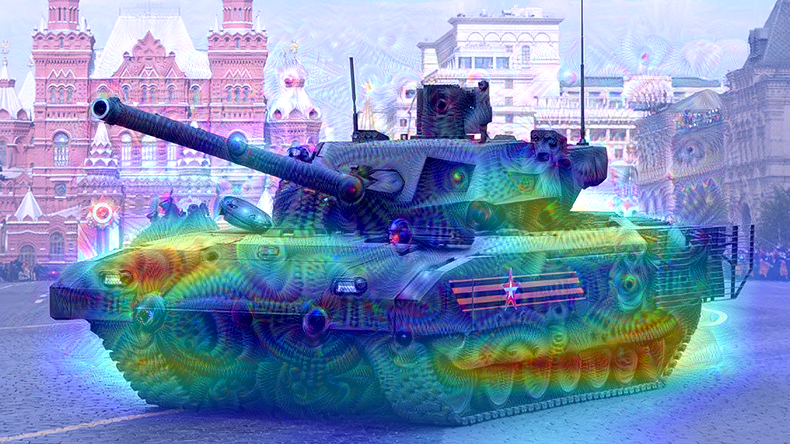

In [14]:
process_image(img_path5)

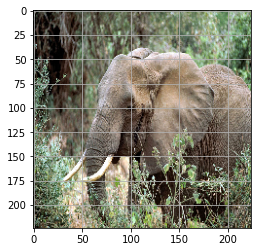

Predicted: [('n01871265', 'tusker', 0.7952475), ('n02504458', 'African_elephant', 0.15169895), ('n02504013', 'Indian_elephant', 0.053053245)]


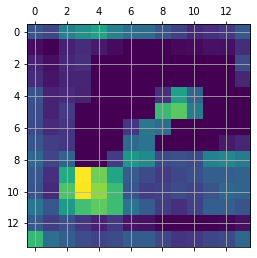

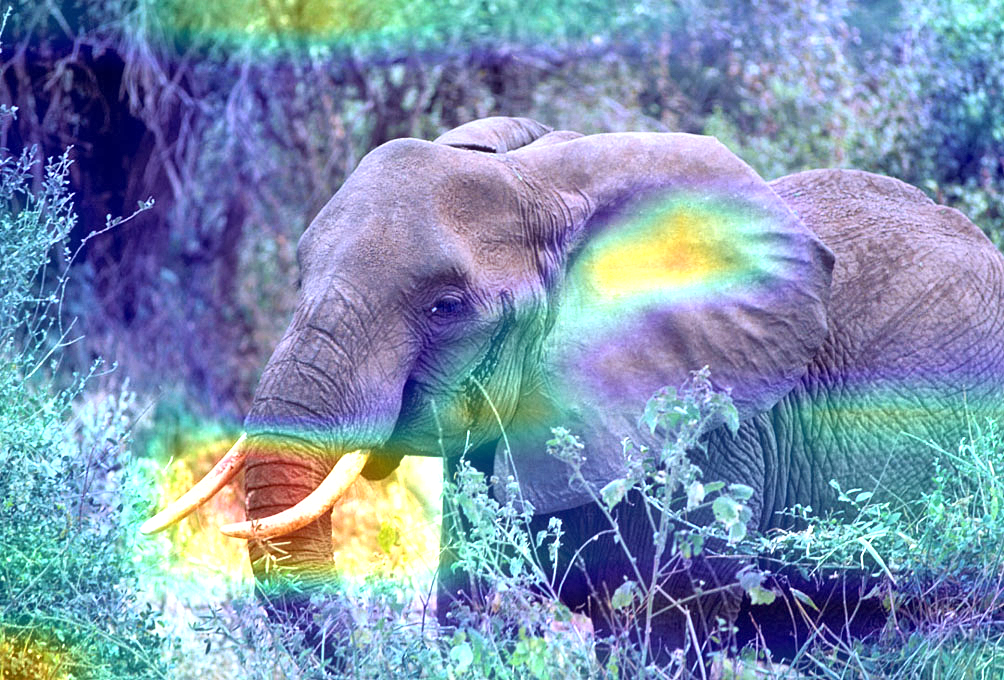

In [15]:
process_image(img_path6)